In [118]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [119]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [120]:
CLASS_NAMES =[
    'airplane', 'automobile', 'bird',
    'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck'
]

validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

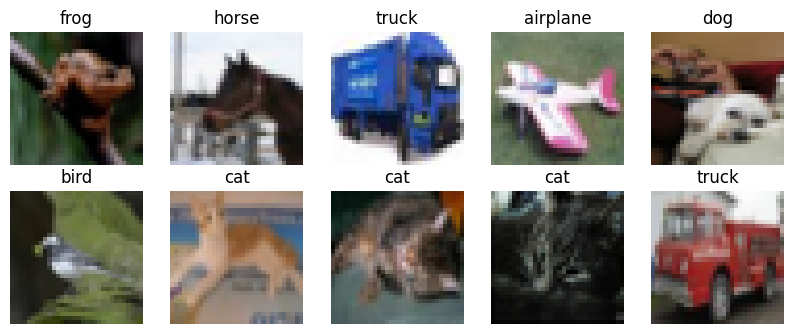

In [121]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(10)):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

plt.show()

In [122]:
def process_images(image, label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image, (64, 64))    
    return image, label

In [123]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()

print("Training data size: ", train_ds_size)
print("Test data size: ", test_ds_size)
print("Validation data size: ", validation_ds_size)


Training data size:  45000
Test data size:  10000
Validation data size:  5000


In [124]:
train_ds = (train_ds.map(process_images)
                    .shuffle(buffer_size=train_ds_size)
                    .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds.map(process_images)
                  .shuffle(buffer_size=test_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds.map(process_images)
                              .shuffle(buffer_size=train_ds_size)
                              .batch(batch_size=32, drop_remainder=True))

In [125]:
model = keras.models.Sequential([
    keras.layers.Conv2D(
        filters=128, kernel_size=(11,11), strides=(4,4),
        activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(
        filters=256, kernel_size=(5,5), strides=(1,1),
        activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(
        filters=256, kernel_size=(3,3), strides=(1,1),
        activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(
        filters=256, kernel_size=(1,1), strides=(1,1),
        activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(
        filters=256, kernel_size=(1,1), strides=(1,1),
        activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [126]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 14, 14, 128)       46592     
_________________________________________________________________
batch_normalization_45 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 7, 7, 256)         819456    
_________________________________________________________________
batch_normalization_46 (Batc (None, 7, 7, 256)         1024      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 2, 2, 256)        

In [128]:
model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds,
    validation_freq=1)

Epoch 1/10
1406/1406 [==============================] - 1104s 770ms/step - loss: 2.1624 - accuracy: 0.2368 - val_loss: 1.7039 - val_accuracy: 0.3856
Epoch 2/10
1406/1406 [==============================] - 1056s 741ms/step - loss: 1.8195 - accuracy: 0.3370 - val_loss: 1.5700 - val_accuracy: 0.4325
Epoch 3/10
1406/1406 [==============================] - 1013s 711ms/step - loss: 1.6781 - accuracy: 0.3894 - val_loss: 1.4986 - val_accuracy: 0.4629
Epoch 4/10
1406/1406 [==============================] - 1025s 720ms/step - loss: 1.5713 - accuracy: 0.4322 - val_loss: 1.4143 - val_accuracy: 0.4966
Epoch 5/10
1406/1406 [==============================] - 942s 660ms/step - loss: 1.4869 - accuracy: 0.4612 - val_loss: 1.3562 - val_accuracy: 0.5210
Epoch 6/10
1406/1406 [==============================] - 952s 667ms/step - loss: 1.4064 - accuracy: 0.4940 - val_loss: 1.3029 - val_accuracy: 0.5387
Epoch 7/10
1406/1406 [==============================] - 1105s 777ms/step - loss: 1.3340 - accuracy: 0.5213 -

In [129]:
model.evaluate(test_ds)

312/312 [==============================] - 38s 111ms/step - loss: 1.1846 - accuracy: 0.5793


[1.1846457719802856, 0.5793269276618958]